# Embedding Dimension Climate/Vegetation across Land Cover types

In [5]:
#plot figures horizontally automatically! 

In [3]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [4]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import re
import itertools

In [5]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'


# 1.  Prediction skill of different embedding dimensions for across variables for each land cover

In [115]:
def ed_vars(in_dir, file, train, test, title):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots all variables on the same figure for a given time series (area/land cover)
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    column_names = ['SM', 'TMP', 'P', 'LST', 'NDVI', 'refET']
    for i in column_names:  
        embed_result = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i, showPlot = False)
        plt.plot(embed_result.E, embed_result.rho, label = str(i))
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Prediction Skill ' r'$\rho$')
    plt.ylim(0, 1, 0.1)
    plt.title('Time Delay Embedding ' + title)
    labelLines(plt.gca().get_lines(), zorder=2.5)
    plt.show()

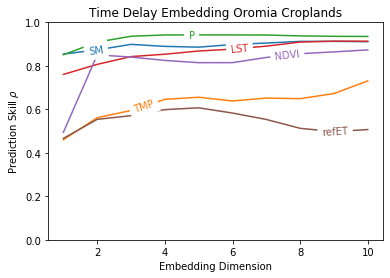

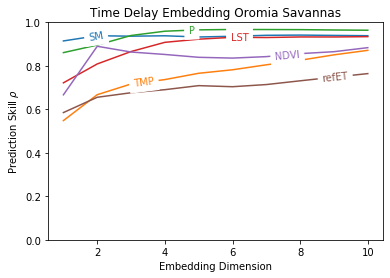

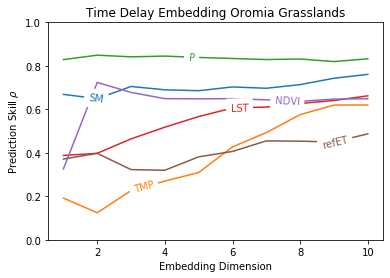

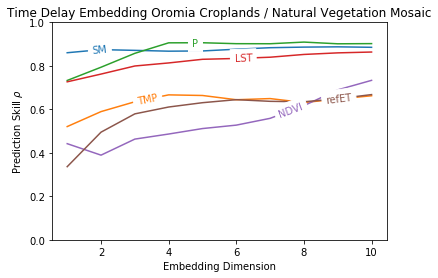

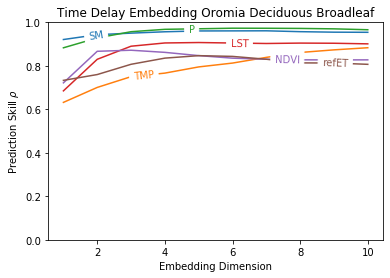

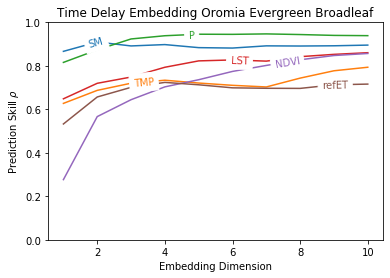

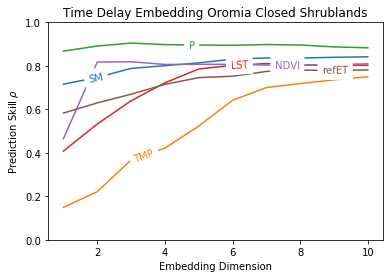

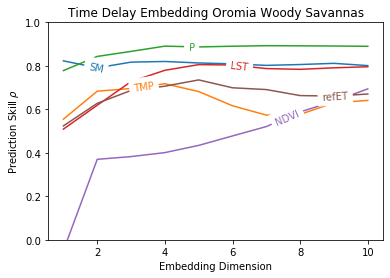

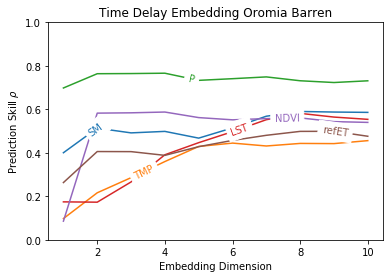

In [118]:
ed_vars(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', '1 100', '101 522', 'Oromia Croplands')
ed_vars(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', '1 100', '101 522', 'Oromia Savannas')
ed_vars(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', '1 100', '101 522', 'Oromia Grasslands')
ed_vars(OROMIA_TS_DIR, 'oromia_cropnatveg_df_norm.csv', '1 100', '101 522', 'Oromia Croplands / Natural Vegetation Mosaic')
ed_vars(OROMIA_TS_DIR, 'oromia_deciduousbroad_df_norm.csv', '1 100', '101 522', 'Oromia Deciduous Broadleaf')
ed_vars(OROMIA_TS_DIR, 'oromia_evergreenbroad_df_norm.csv', '1 100', '101 522', 'Oromia Evergreen Broadleaf')
ed_vars(OROMIA_TS_DIR, 'oromia_closedshrublands_df_norm.csv', '1 100', '101 522', 'Oromia Closed Shrublands')
ed_vars(OROMIA_TS_DIR, 'oromia_woodysavannas_df_norm.csv', '1 100', '101 522', 'Oromia Woody Savannas')
ed_vars(OROMIA_TS_DIR, 'oromia_barren_df_norm.csv', '1 100', '101 522', 'Oromia Barren')

# 2.  Prediction skill of different embedding dimensions for across land covers for each variable

In [113]:
def ed_lcs(in_dir, var, train, test, title, Tp, tau):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots all land cover times series data on the same figure for a given variable
    
    Args:
    in_dir = path to directory of time series datasets
    var = environmental variable 
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of variable tested
    Tp = Prediction Interval
    tau = Embedding delay 
    
    '''
    files = np.array(os.listdir(in_dir))
    csvs = pd.Series(files).str.contains('.csv')
    files = files[csvs]
    
    for i in files:  
        embed_result = EmbedDimension(pathIn = in_dir, dataFile = i, lib = train, pred = test, Tp = Tp, tau = tau, columns = var, showPlot = False)
        plt.plot(embed_result.E, embed_result.rho, label = str(i[7:-12]))
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Prediction Skill ' r'$\rho$')
    plt.ylim(0, 1, 0.1)
    plt.title('Time Delay Embedding ' + title)
    plt.legend(loc = 'lower right', ncol = 2, fontsize = 8, title = 'Land Cover')
    plt.show()

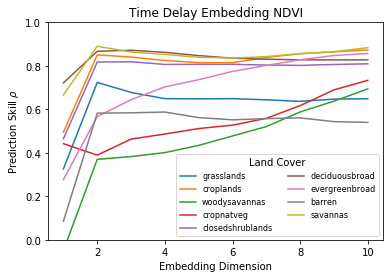

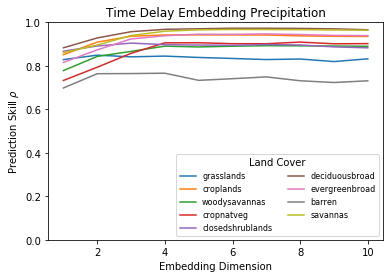

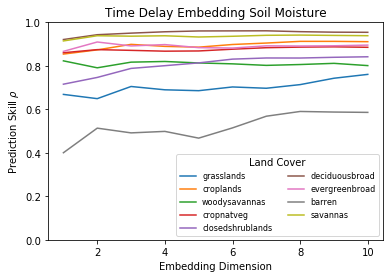

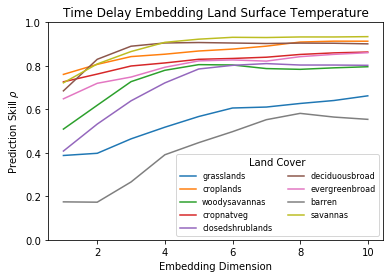

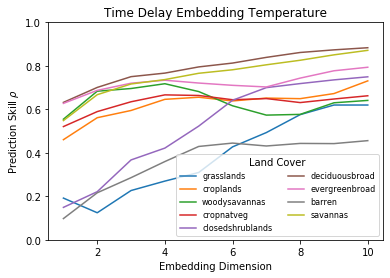

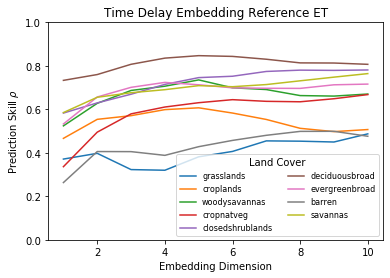

In [114]:
ed_lcs(OROMIA_TS_DIR, 'NDVI', '1 100', '101 522', 'NDVI', 1, -1)
ed_lcs(OROMIA_TS_DIR, 'P', '1 100', '101 522', 'Precipitation', 1, -1)
ed_lcs(OROMIA_TS_DIR, 'SM', '1 100', '101 522', 'Soil Moisture', 1, -1)
ed_lcs(OROMIA_TS_DIR, 'LST', '1 100', '101 522', 'Land Surface Temperature', 1, -1)
ed_lcs(OROMIA_TS_DIR, 'TMP', '1 100', '101 522', 'Temperature', 1, -1)
ed_lcs(OROMIA_TS_DIR, 'refET', '1 100', '101 522', 'Reference ET', 1, -1)

# 3.  Prediction skill of different embedding dimensions for a variable for different prediction intervals 

In [111]:
def ed_lcs_tp(in_dir, file, var, train, test, title, tau):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 and plots the prediction interval result for values 1-10 on the same figure for a given variable
    
    Args:
    in_dir = path to directory of time series datasets
    var = environmental variable 
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of land cover and variable tested
    tau = Embedding delay 
    
    '''
    predict_interval = list(range(1,11))
    
    for i in predict_interval:  
        embed_result = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, Tp = i, tau = tau, columns = var, showPlot = False)
        plt.plot(embed_result.E, embed_result.rho, label = i)
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Prediction Skill ' r'$\rho$')
    plt.ylim(0, 1, 0.1)
    plt.title('Time Delay Embedding ' + title)
    plt.legend(loc = 'lower right', ncol = 2, fontsize = 8, title = 'Prediction Interval')
    plt.show()

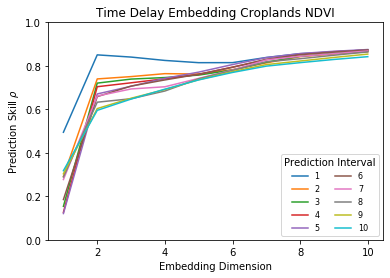

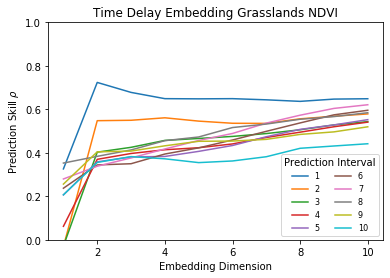

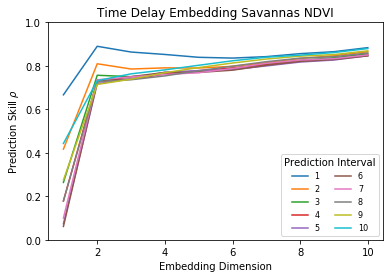

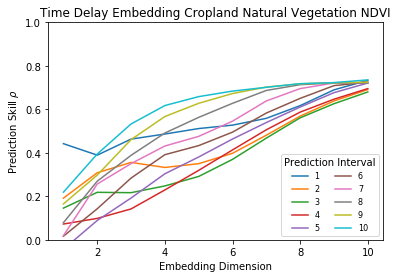

In [112]:
ed_lcs_tp(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', '1 100', '101 522', 'Croplands NDVI', -1)
ed_lcs_tp(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'NDVI', '1 100', '101 522', 'Grasslands NDVI', -1)
ed_lcs_tp(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'NDVI', '1 100', '101 522', 'Savannas NDVI', -1)
ed_lcs_tp(OROMIA_TS_DIR, 'oromia_cropnatveg_df_norm.csv', 'NDVI', '1 100', '101 522', 'Cropland Natural Vegetation NDVI', -1)

# 4.  Prediction skill of different embedding dimensions for one variable on another across land covers

In [122]:
columnnames = list(itertools.permutations(['NDVI', 'SM', 'TP', 'P', 'LST', 'refET'],2))

In [137]:
[names[0] for names in columnnames][10]

'TMP'

In [6]:
def ed_vars_cross(in_dir, file, train, test, title):
    '''
    This function evaluates the Simplex prediction skill for embedding dimensions 1 to 10 between two variables for a given land cover and area
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    for i in column_names: 
        embed_result1 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[0], target = i[1], showPlot = False)
        embed_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        fig = plt.figure()
        plt.plot(embed_result1.E, embed_result1.rho, label = i[0] + r'$\rightarrow$' + i[1])
        plt.plot(embed_result2.E, embed_result2.rho, label = i[1] + r'$\rightarrow$' + i[0])
        plt.xlabel('Embedding Dimension')
        plt.ylabel('Cross Prediction Skill ' r'$\rho$')
        plt.ylim(0, 1, 0.1)
        plt.title('Cross Time Delay Embedding ' + title)
        #labelLines(plt.gca().get_lines(), zorder=2.5)
        plt.legend(loc = 'lower right', fontsize = 8, title = 'Embedded Variables \n (Original' + r'$\rightarrow$' + 'Target)')
        plt.show()

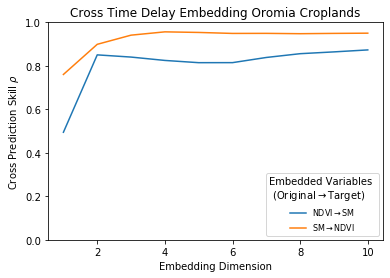

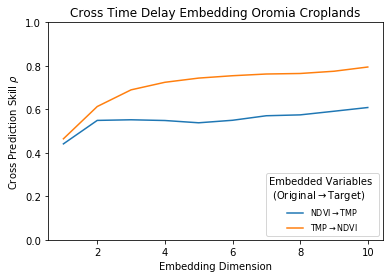

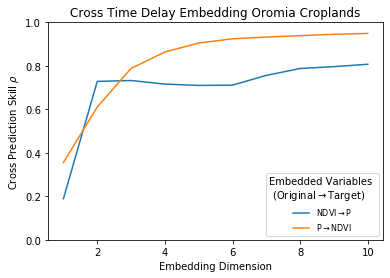

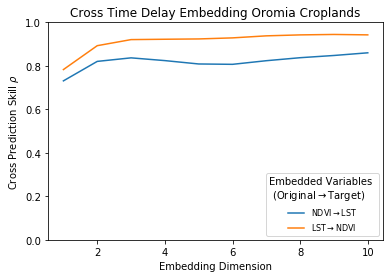

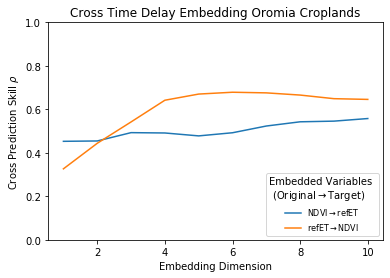

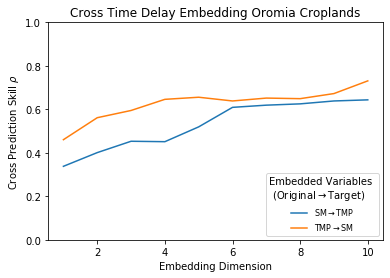

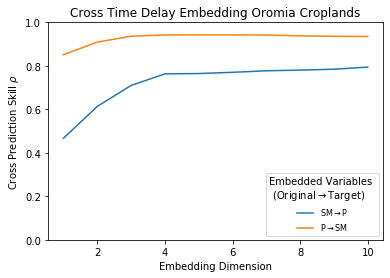

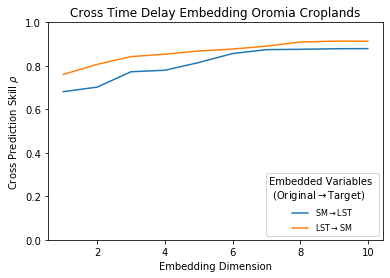

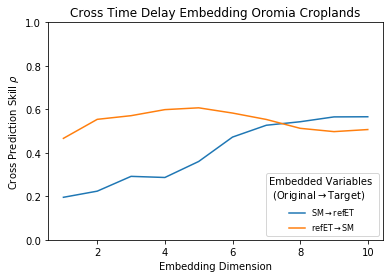

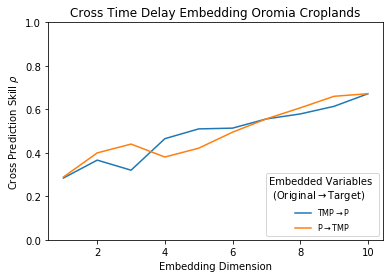

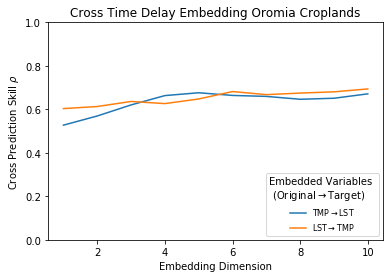

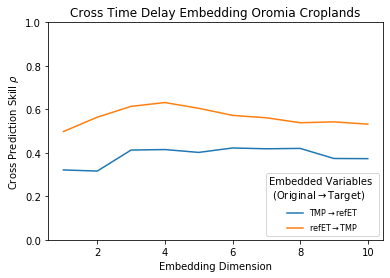

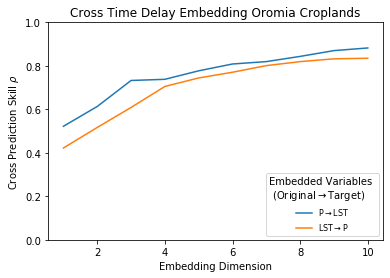

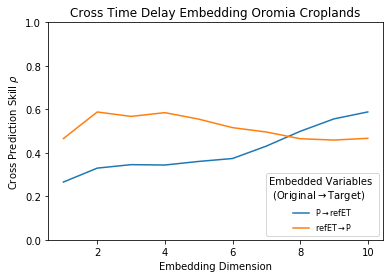

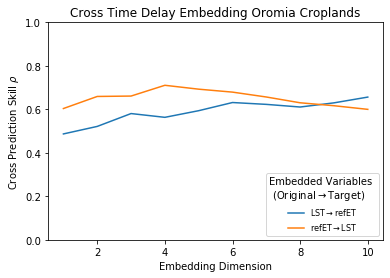

In [7]:
ed_vars_cross(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', '1 100', '101 522', 'Oromia Croplands')

In [ ]:
# \leftarrow

In [157]:
len(list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2)))

15